In [3]:
1.03**10


1.3439163793441222

In [4]:
1+1


2

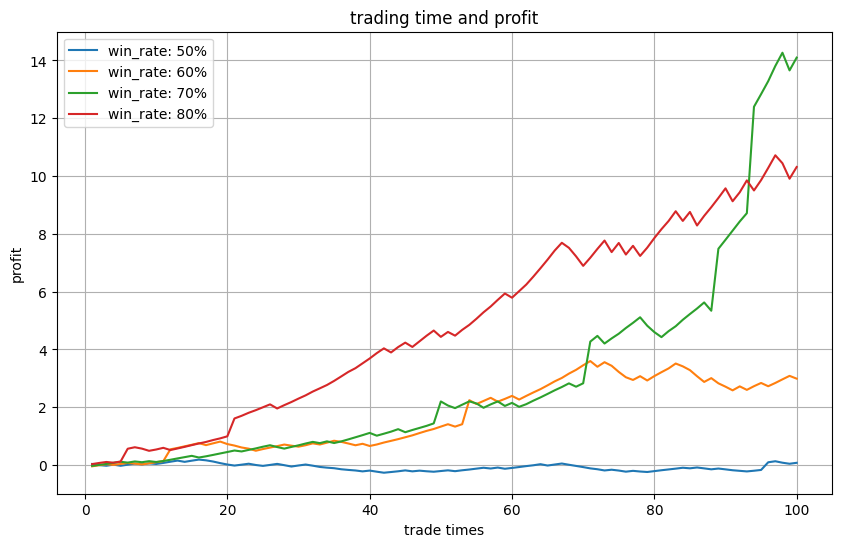

In [ ]:
# %pip install matplotlib
import matplotlib.pyplot as plt

import numpy as np

# 设置参数
num_trades = 100  # 交易次数
profit_range = (0.03, 0.04)  # 每次交易的收益范围
loss_range = (-0.05, -0.02)  # 每次交易的回撤范围

# 设置不同的胜率
win_rates = [0.5,0.6, 0.7, 0.8]
# 初始化图形
plt.figure(figsize=(10, 6))

# 绘制不同胜率的曲线
for win_rate in win_rates:
    profits = []
    for _ in range(num_trades):
        if np.random.rand() < win_rate:

            if np.random.rand() < 0.05:
                profit = np.random.uniform(profit_range[0], profit_range[1]) * 10
            else:
                profit = np.random.uniform(profit_range[0], profit_range[1])
        else:
            profit = np.random.uniform(loss_range[0], loss_range[1])
        profits.append(profit)
    total_profit = np.prod([1 + p for p in profits]) - 1
    plt.plot(range(1, num_trades + 1), np.cumprod([1 + p for p in profits]) - 1, label=f'win_rate: {win_rate * 100:.0f}%')

# 添加标题和标签
plt.title('trading time and profit')
plt.xlabel('trade times')
plt.ylabel('profit')
plt.legend()
plt.grid(True)

plt.show()


In [50]:
stages = ['0_召回','1_粗排','2_1_精排top50','2_精排','3_重排','4.1_冷启','4.2_曝光']

for stage in stages:
    print(f'''
,SUM(pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '{stage}') / SUM(pv) FILTER(WHERE stage = '{stage}')                                     AS {stage}pv占比
,SUM(avg_rank_pos * pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '{stage}') / SUM(pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '{stage}') AS {stage}平均排名
''')




,SUM(pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '0_召回') / SUM(pv) FILTER(WHERE stage = '0_召回')                                     AS 0_召回pv占比
,SUM(avg_rank_pos * pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '0_召回') / SUM(pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '0_召回') AS 0_召回平均排名


,SUM(pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '1_粗排') / SUM(pv) FILTER(WHERE stage = '1_粗排')                                     AS 1_粗排pv占比
,SUM(avg_rank_pos * pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '1_粗排') / SUM(pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '1_粗排') AS 1_粗排平均排名


,SUM(pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '2_1_精排top50') / SUM(pv) FILTER(WHERE stage = '2_1_精排top50')                                     AS 2_1_精排top50pv占比
,SUM(avg_rank_pos * pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '2_1_精排top50') / SUM(pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '2_1_精排top50') AS 2_1_精排top50平均排名


,SUM(pv) FILTER(WHERE 是否是目标内容 = 1 AND stage = '2_精排') / SUM(pv) FILTER(WHERE stage = '2_精排')                            

In [ ]:
case when 发布天数 = 1 then '1'
when 发布天数 BETWEEN 2 AND 5 then '2-5'
when 发布天数 BETWEEN 4 AND 7 then '4-7'
when 发布天数 BETWEEN 8 AND 30 then '8-30'
when 发布天数 BETWEEN 31 AND 60 then '31-60'
when 发布天数 BETWEEN 61 AND 90 then '61-90'
when 发布天数 > 90 then '90+'
else '未知' end as 发布天数分段